In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import pyplot
from qgis.core import *
from qgis.PyQt.QtGui import *
from qgis.PyQt.QtCore import *
from IPython.display import Image

In [2]:
QgsApplication.setPrefixPath(r'C:\\OSGeo4W64\\apps\\qgis', True)
qgs = QgsApplication([], True)
qgs.initQgis()
sys.path.append(r'C:\OSGeo4W64\apps\qgis\python\plugins')
project = QgsProject.instance()

In [3]:
path = "C:\\OSGeo4W64\\bin\\SIG\\Projeto_Italy\\Mapa\\ITA_adm1.shp"
map_layer = QgsVectorLayer(path, 'Italy map', 'ogr')

if not map_layer.isValid():
    print("Failed to load the layer!")
else:
    project.addMapLayer(map_layer)
    print("Sucess")

Sucess


In [4]:
csv_path = "file:///C:/OSGeo4W64/bin/SIG/Projeto_Italy/Dataset/covid_italy.csv?delimiter=,'"
csv_layer = QgsVectorLayer(csv_path, 'Data', 'delimitedtext')

if not csv_layer.isValid():
    print('Layer failed to load!')
else:
    project.addMapLayer(csv_layer)
    print("Sucess")

Sucess


In [5]:
joinName = 'name_region'
targetName = 'NAME_1'

joinObject = QgsVectorLayerJoinInfo()
joinObject.setJoinFieldName(joinName)
joinObject.setTargetFieldName(targetName)
joinObject.setJoinLayerId(csv_layer.id())
joinObject.setUsingMemoryCache(True)
joinObject.setJoinLayer(csv_layer)
flag = map_layer.addJoin(joinObject)

# Graphics TOP-5

In this section, we try to understand which are the regions:
    1. With more cases and fewer cases;
    2. With more deaths and fewer deaths;
    3. With more cases recovered;
    4. With more hospitalized cases;

In [6]:
dict = []

for feature in map_layer.getFeatures():
    if feature['NAME_1']:
        state = feature['NAME_1']
        if feature['Data_deaths']:
            death = feature['Data_deaths']
        else:
            death = 0
        if feature['Data_total_case']:
            confirmed = feature['Data_total_case']
        else:
            confirmed = 0
        if feature['Data_discharged_healed']:
            recovered = feature['Data_discharged_healed']
        else:
            recovered = 0
        if feature['Data_total_hospitalized']:
            hospitalized = feature['Data_total_hospitalized']
        else:
            hospitalized = 0
    e = {'Name': state, 'Confirmed': confirmed, 'Death': death, 'Recovered': recovered, 'Hospitalized': hospitalized }
    dict.append(e)

In [7]:
size = len(dict)-5

c = sorted(dict, key = lambda i: i['Confirmed'],reverse=True)
d = sorted(dict, key = lambda i: i['Death'],reverse=True)
r = sorted(dict, key = lambda i: i['Recovered'],reverse=True)
v= sorted(dict, key = lambda i: i['Hospitalized'],reverse=True)

top5confirmed = c[0:5]
top5death = d[0:5]
top5recovered = r[0:5]
top5hospitalized = v[0:5]

bottom5confirmed = c[size:]
bottom5death = d[size:]

**Top 5  - Regions with Most Confirmed Cases**

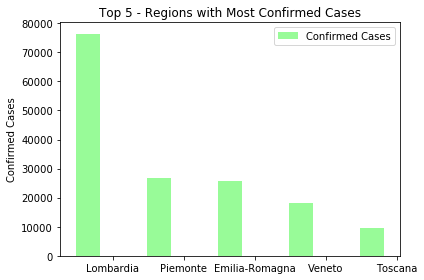

In [8]:
delta1 = [top5confirmed[0]['Confirmed'],top5confirmed[1]['Confirmed'],top5confirmed[2]['Confirmed'],top5confirmed[3]['Confirmed'],top5confirmed[4]['Confirmed']]
states = [top5confirmed[0]['Name'],top5confirmed[1]['Name'],top5confirmed[2]['Name'],top5confirmed[3]['Name'],top5confirmed[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Confirmed Cases', color=['palegreen'])

plt.ylabel('Confirmed Cases')
plt.title('Top 5 - Regions with Most Confirmed Cases')
plt.xticks(index + bar_width,states,)
plt.legend()
plt.savefig('../Imagens/Top5_more_cases.png', dpi=300, format='png')
plt.tight_layout()
plt.show()

**Top 5 - Regions with Fewer Confirmed Cases**

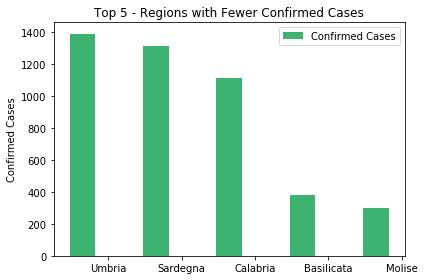

In [9]:
delta1 = [bottom5confirmed[0]['Confirmed'],bottom5confirmed[1]['Confirmed'],bottom5confirmed[2]['Confirmed'],bottom5confirmed[3]['Confirmed'],bottom5confirmed[4]['Confirmed']]
states = [bottom5confirmed[0]['Name'],bottom5confirmed[1]['Name'],bottom5confirmed[2]['Name'],bottom5confirmed[3]['Name'],bottom5confirmed[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Confirmed Cases', color=['mediumseagreen'])

plt.ylabel('Confirmed Cases')
plt.title('Top 5 - Regions with Fewer Confirmed Cases')
plt.xticks(index + bar_width,states,)
plt.legend()
plt.savefig('../Imagens/Top5_fewer_cases.png', dpi=300, format='png')
plt.tight_layout()
plt.show()

**Top 5 regions with More Deaths**

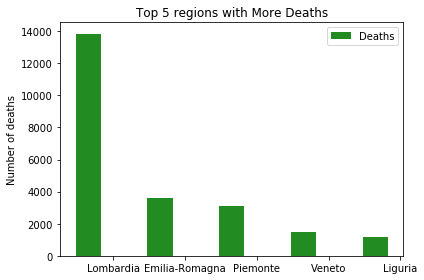

In [10]:
delta1 = [top5death[0]['Death'],top5death[1]['Death'],top5death[2]['Death'],top5death[3]['Death'],top5death[4]['Death']]
states = [top5death[0]['Name'],top5death[1]['Name'],top5death[2]['Name'],top5death[3]['Name'],top5death[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Deaths', color=['forestgreen'])

plt.ylabel('Number of deaths')
plt.title('Top 5 regions with More Deaths')
plt.xticks(index + bar_width,states,)
plt.legend()
plt.savefig('../Imagens/Top5_more_deaths.png', dpi=300, format='png')
plt.tight_layout()
plt.show()

**Top 5 regions with Fewer Deaths**

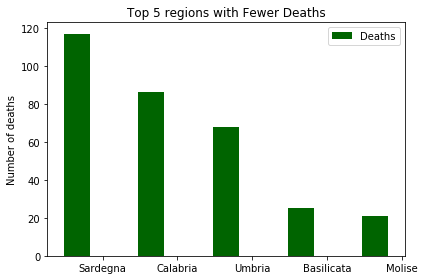

In [11]:
delta1 = [bottom5death[0]['Death'],bottom5death[1]['Death'],bottom5death[2]['Death'],bottom5death[3]['Death'],bottom5death[4]['Death']]
states = [bottom5death[0]['Name'],bottom5death[1]['Name'],bottom5death[2]['Name'],bottom5death[3]['Name'],bottom5death[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Deaths', color=['darkgreen'])

plt.ylabel('Number of deaths')
plt.title('Top 5 regions with Fewer Deaths')
plt.xticks(index + bar_width,states,)
plt.legend()
plt.savefig('../Imagens/Top5_fewer_deaths.png', dpi=300, format='png')
plt.tight_layout()
plt.show()

**Top 5 regions with More Recovered Cases**

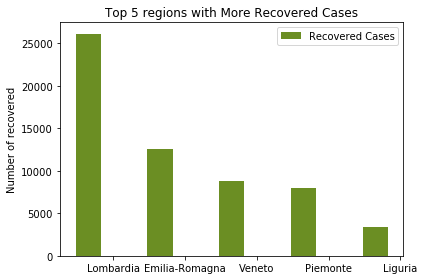

In [12]:
delta1 = [top5recovered[0]['Recovered'],top5recovered[1]['Recovered'],top5recovered[2]['Recovered'],top5recovered[3]['Recovered'],top5recovered[4]['Recovered']]
states = [top5recovered[0]['Name'],top5recovered[1]['Name'],top5recovered[2]['Name'],top5recovered[3]['Name'],top5recovered[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Recovered Cases', color=['olivedrab'])


plt.ylabel('Number of recovered')
plt.title('Top 5 regions with More Recovered Cases')
plt.xticks(index + bar_width,states,)
plt.legend()
plt.savefig('../Imagens/Top5_more_recovered.png', dpi=300, format='png')
plt.tight_layout()
plt.show()

**Top 5 regions with more Hospitalized Cases**

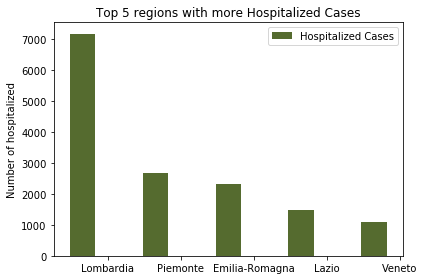

In [13]:
delta1 = [top5hospitalized[0]['Hospitalized'],top5hospitalized[1]['Hospitalized'],top5hospitalized[2]['Hospitalized'],top5hospitalized[3]['Hospitalized'],top5hospitalized[4]['Hospitalized']]
states = [top5hospitalized[0]['Name'],top5hospitalized[1]['Name'],top5hospitalized[2]['Name'],top5hospitalized[3]['Name'],top5hospitalized[4]['Name']]

fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35

rects1 = plt.bar(index, delta1, bar_width, label='Hospitalized Cases', color=['darkolivegreen'])


plt.ylabel('Number of hospitalized')
plt.title('Top 5 regions with more Hospitalized Cases')
plt.xticks(index + bar_width,states,)
plt.legend()
plt.savefig('../Imagens/Top5_more_hospitalized.png', dpi=300, format='png')
plt.tight_layout()
plt.show()

As can be seen, the Italian region most affected was Lombardy. 

Then, the Piemonte and Emilia-Romagna regions are quite equivalent, with little variation in the selected criteria. However, in cases of recovery, it should be noted that the Emilia-Romagna region has a greater number of recovered cases.

On the other hand, the region least affected by covid19 was Molise.

# Pie Chart

With the coronavirus, in many countries, such as Italy, the health system suffered a disruption due to the high number of users in hospitals. 

Thus, we sought to understand the regional distribution of the number of hospitalized population, as well as that which was hospitalized in intensive care.

**Regional distribution of the number of hospitalized cases**

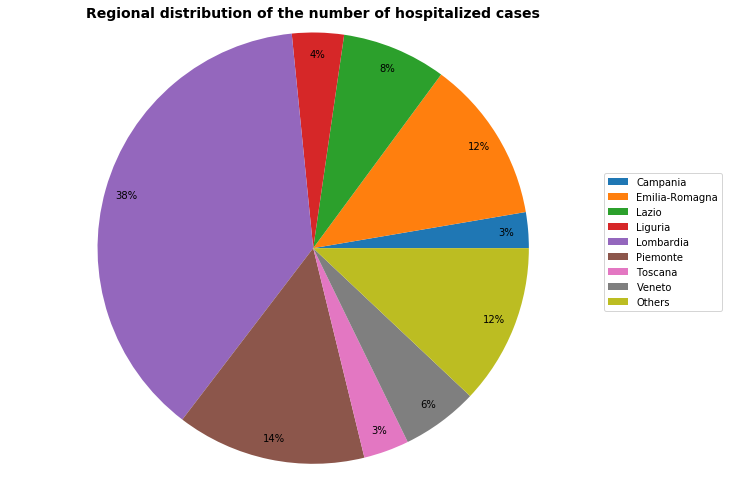

In [14]:
values = []
labels = []
total = 0
lowerTotal = 0
i = 0

for feature in map_layer.getFeatures():
    if feature['Data_total_hospitalized']:
        total += feature['Data_total_hospitalized']

for feature in map_layer.getFeatures():
    if feature['Data_total_hospitalized']:
        if (feature['Data_total_hospitalized']/total) > 0.025:
            values.append(feature['Data_total_hospitalized'])
            labels.append(feature['NAME_1'])
        else:
            lowerTotal += feature['Data_total_hospitalized']

values.append(lowerTotal)
labels.append("Others")

plt.subplots(figsize=(10,8))
plt.gca().axis("equal")
pie = plt.pie(values, startangle=0, autopct='%1.0f%%', pctdistance=0.9, radius=1.2)
plt.title('Regional distribution of the number of hospitalized cases', weight='bold', size=14)
plt.legend(pie[0],labels, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)
plt.savefig('../Imagens/regional_distribution_hospital.png', dpi=300, format='png')
plt.show()
plt.clf()
plt.close()

**Regional distribution of the number of cases in intensive care**

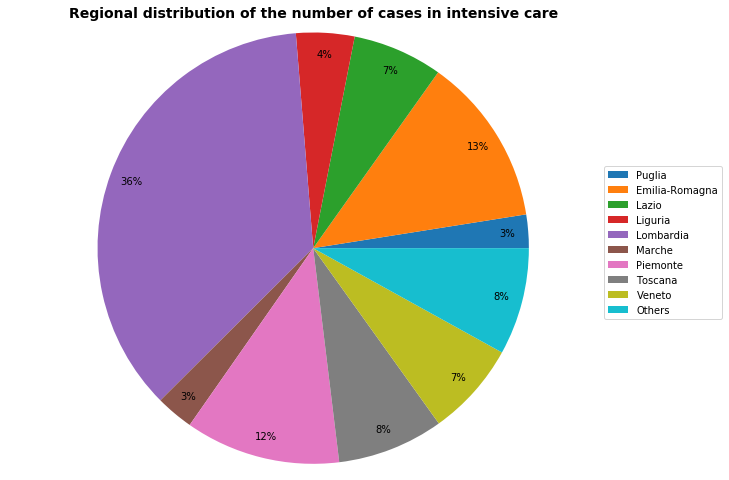

In [15]:
values = []
labels = []
total = 0
lowerTotal = 0
i = 0

for feature in map_layer.getFeatures():
    if feature['Data_intensive_care']:
        total += feature['Data_intensive_care']

for feature in map_layer.getFeatures():
    if feature['Data_intensive_care']:
        if (feature['Data_intensive_care']/total) > 0.025:
            values.append(feature['Data_intensive_care'])
            labels.append(feature['NAME_1'])
        else:
            lowerTotal += feature['Data_intensive_care']
            
plt.subplots(figsize=(10,8))
values.append(lowerTotal)
labels.append("Others")

plt.gca().axis("equal")
pie = plt.pie(values, startangle=0, autopct='%1.0f%%', pctdistance=0.9, radius=1.2)
plt.title('Regional distribution of the number of cases in intensive care', weight='bold', size=14)
plt.legend(pie[0],labels, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)
plt.savefig('../Imagens/regional_distribution_uci.png', dpi=300, format='png')
plt.show()
plt.clf()
plt.close()

# Bar chart


In this section, we tried to compare the regions most affected by numerous criteria, as well as to compare the region most affected with the region least affected by the virus.

**Comparison between the most affected regions - Placed of hospitalization and recovery**

 Lombardia vs Piemonte

In [16]:
lombardia_region = []
piamonte_region = []
nome = ["Lombardia", "Piemonte"]

for feature in map_layer.getFeatures():
    if feature['NAME_1']=="Lombardia":
        lombardia_region.append(feature['Data_total_hospitalized'])
        lombardia_region.append(feature['Data_intensive_care'])
        lombardia_region.append(feature['Data_home_isolation'])
        lombardia_region.append(feature['Data_discharged_healed'])

for feature in map_layer.getFeatures():
    if feature['NAME_1']=="Piemonte":
        piamonte_region.append(feature['Data_total_hospitalized'])
        piamonte_region.append(feature['Data_intensive_care'])
        piamonte_region.append(feature['Data_home_isolation'])
        piamonte_region.append(feature['Data_discharged_healed'])

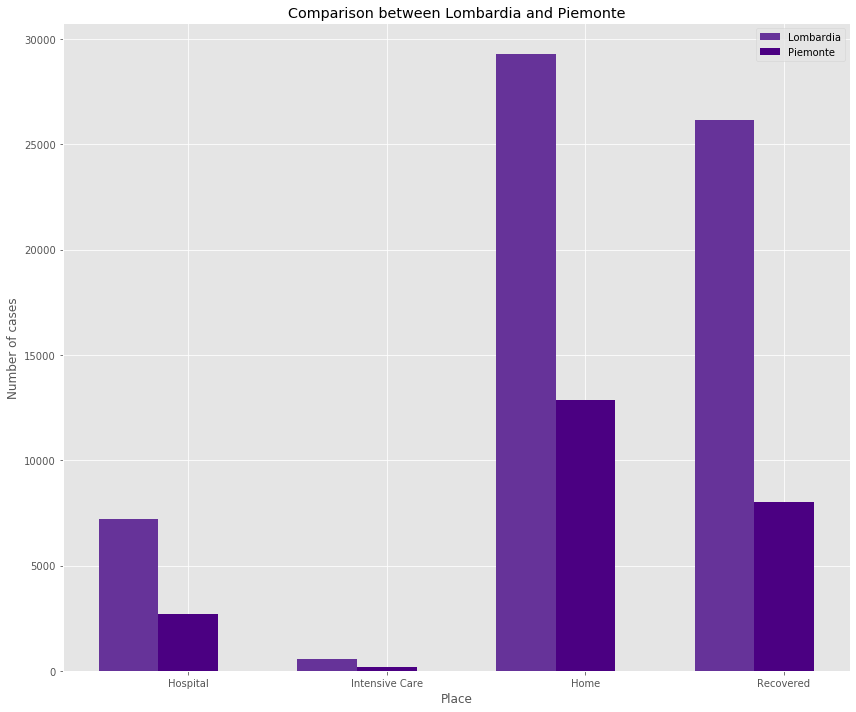

In [17]:
n_groups = 4
index = np.arange(n_groups)
width = 0.3
opacity = 1
plt.style.use('ggplot')
plt.subplots(figsize=(12,10))

rects1 = plt.bar(index, lombardia_region, width,alpha=opacity, color='rebeccapurple', label='Lombardia')

rects2 = plt.bar(index + width, piamonte_region, width,alpha=opacity, color='indigo',label='Piemonte')

plt.xlabel('Place')
plt.ylabel('Number of cases')
plt.title("Comparison between Lombardia and Piemonte")
plt.xticks(index + width, ('Hospital', 'Intensive Care', 'Home', 'Recovered'))
plt.legend()
plt.savefig('../Imagens/comparation_lombardia_piemonte.png', dpi=300, format='png')
plt.tight_layout()
plt.show()

Lombardia vs Emilia-Romagna

In [18]:
lombardia_region = []
emilia_region = []
nome = ["Lombardia", "Emilia-Romagna"]

for feature in map_layer.getFeatures():
    if feature['NAME_1']=="Lombardia":
        lombardia_region.append(feature['Data_total_hospitalized'])
        lombardia_region.append(feature['Data_intensive_care'])
        lombardia_region.append(feature['Data_home_isolation'])
        lombardia_region.append(feature['Data_discharged_healed'])

for feature in map_layer.getFeatures():
    if feature['NAME_1']=="Emilia-Romagna":
        emilia_region.append(feature['Data_total_hospitalized'])
        emilia_region.append(feature['Data_intensive_care'])
        emilia_region.append(feature['Data_home_isolation'])
        emilia_region.append(feature['Data_discharged_healed'])

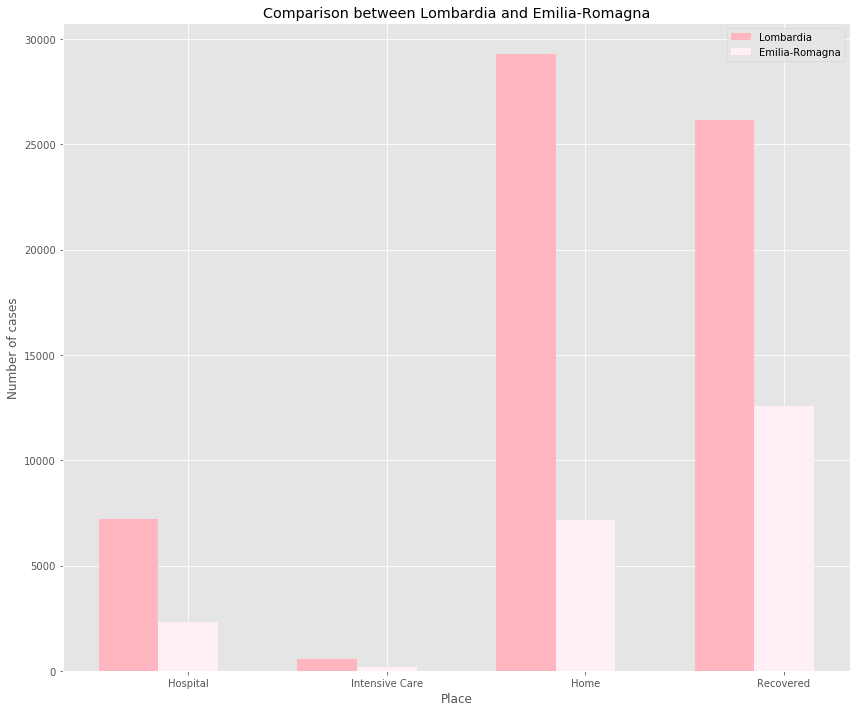

In [19]:
n_groups = 4
index = np.arange(n_groups)
width = 0.3
opacity = 1
plt.style.use('ggplot')
plt.subplots(figsize=(12,10))

rects1 = plt.bar(index, lombardia_region, width,alpha=opacity, color='lightpink', label='Lombardia')

rects2 = plt.bar(index + width, emilia_region, width,alpha=opacity, color='lavenderblush',label='Emilia-Romagna')

plt.xlabel('Place')
plt.ylabel('Number of cases')
plt.title("Comparison between Lombardia and Emilia-Romagna")
plt.xticks(index + width, ('Hospital', 'Intensive Care', 'Home', 'Recovered'))
plt.legend()
plt.savefig('../Imagens/comparation_lombardia_emilia.png', dpi=300, format='png')
plt.tight_layout()
plt.show()

**Comparison between the most affected and the least affected region - different criteria**

In [20]:
lombardia = []
molise = []

for feature in map_layer.getFeatures():
    if feature['NAME_1']=="Lombardia":
        lombardia.append(feature['Data_total_case'])
        lombardia.append(feature['Data_discharged_healed'])
        lombardia.append(feature['Data_total_positive'])
        lombardia.append(feature['Data_intensive_care'])
        lombardia.append(feature['Data_total_hospitalized'])
        lombardia.append(feature['Data_home_isolation'])
        lombardia.append(feature['Data_deaths'])
        lombardia.append(feature['Data_material_use'])
        
for feature in map_layer.getFeatures():
    if feature['NAME_1']=="Molise":
        molise.append(feature['Data_total_case'])
        molise.append(feature['Data_discharged_healed'])
        molise.append(feature['Data_total_positive'])
        molise.append(feature['Data_intensive_care'])
        molise.append(feature['Data_total_hospitalized'])
        molise.append(feature['Data_home_isolation'])
        molise.append(feature['Data_deaths'])
        molise.append(feature['Data_material_use'])        
        
        
        
print(lombardia)
print(molise)

from matplotlib import axis

[76469, 26136, 36473, 563, 7191, 29282, 13860, 390644]
[300, 89, 190, 1, 18, 172, 21, 6463]


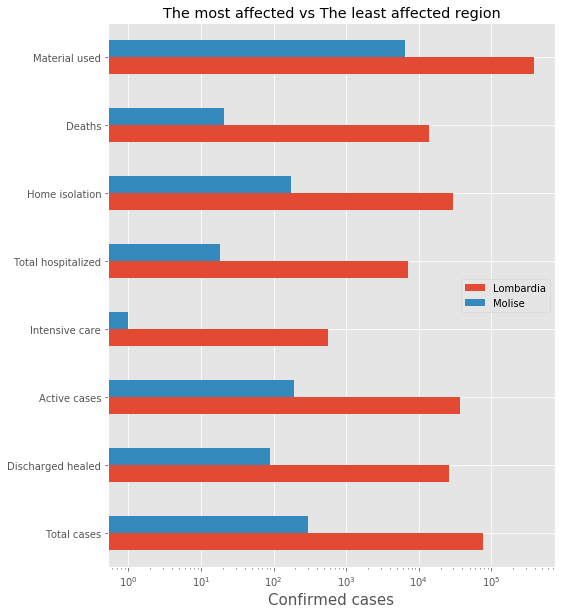

In [21]:
index = ['Total cases', 'Discharged healed', 'Active cases',
          'Intensive care', 'Total hospitalized', 'Home isolation', 'Deaths', 'Material used']



df = pd.DataFrame({'Lombardia': lombardia,
                   'Molise': molise}, index=index)


ax = df.plot(kind='barh', figsize=(8, 10), zorder=2, width=0.5)
plt.title("The most affected vs The least affected region")
plt.xscale("log")
plt.xlabel('Confirmed cases', fontsize=15)
plt.savefig('../Imagens/comparation_lombardia_molise.png', dpi=300, format='png')

**Comparison between Piemonte and Emilia-Romagna - different criteria**


With the equivalence of values ​​in numerous criteria, between Piedmont and Emilia-Romagna, there was a need to study the different areas and understand where these two regions stood out along the covid19.

In [22]:
piemonte = []
emilia = []

for feature in map_layer.getFeatures():
    if feature['NAME_1']=="Piemonte":
        piemonte.append(feature['Data_total_case'])
        piemonte.append(feature['Data_discharged_healed'])
        piemonte.append(feature['Data_total_positive'])
        piemonte.append(feature['Data_intensive_care'])
        piemonte.append(feature['Data_total_hospitalized'])
        piemonte.append(feature['Data_home_isolation'])
        piemonte.append(feature['Data_deaths'])
        piemonte.append(feature['Data_material_use'])
        
for feature in map_layer.getFeatures():
    if feature['NAME_1']=="Emilia-Romagna":
        emilia.append(feature['Data_total_case'])
        emilia.append(feature['Data_discharged_healed'])
        emilia.append(feature['Data_total_positive'])
        emilia.append(feature['Data_intensive_care'])
        emilia.append(feature['Data_total_hospitalized'])
        emilia.append(feature['Data_home_isolation'])
        emilia.append(feature['Data_deaths'])
        emilia.append(feature['Data_material_use'])        
        
        
        
print(lombardia)
print(emilia)

from matplotlib import axis

[76469, 26136, 36473, 563, 7191, 29282, 13860, 390644]
[25644, 12581, 9484, 197, 2309, 7175, 3579, 188264]


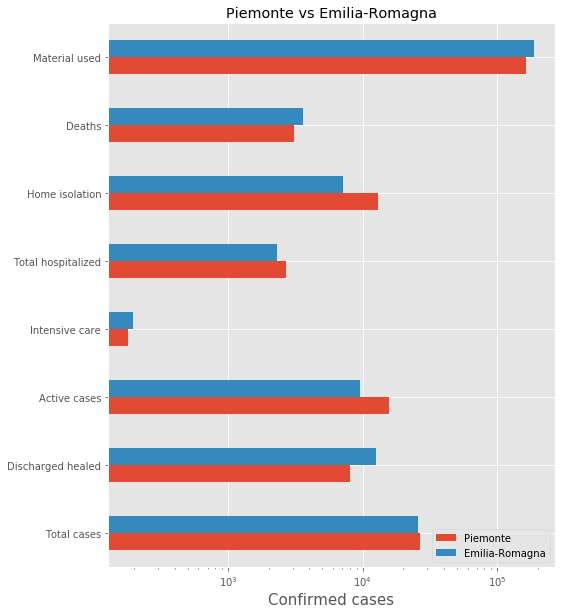

In [23]:
index = ['Total cases', 'Discharged healed', 'Active cases',
          'Intensive care', 'Total hospitalized', 'Home isolation', 'Deaths', 'Material used']



df = pd.DataFrame({'Piemonte': piemonte,
                   'Emilia-Romagna': emilia}, index=index)


ax = df.plot(kind='barh', figsize=(8, 10), zorder=2, width=0.5)
plt.title("Piemonte vs Emilia-Romagna")
plt.xscale("log")
plt.xlabel('Confirmed cases', fontsize=15)
plt.savefig('../Imagens/comparation_piemonte_emilia.png', dpi=300, format='png')

# Daily evolution

**Most affected region of italy - Lombardia**

In [28]:
total_case = []
deaths = []
datas = []
discharged_healed = []
total_positive = []

for feature in csv_layer.getFeatures():
    if feature['name_region']=="Lombardia":
        total_case.append(feature['total_case'])
        deaths.append(feature['deaths'])
        datas.append(feature['data'])
        discharged_healed.append(feature['discharged_healed'])
        total_positive.append(feature['total_positive'])

Text(119.125, 0.5, 'Number of cases')

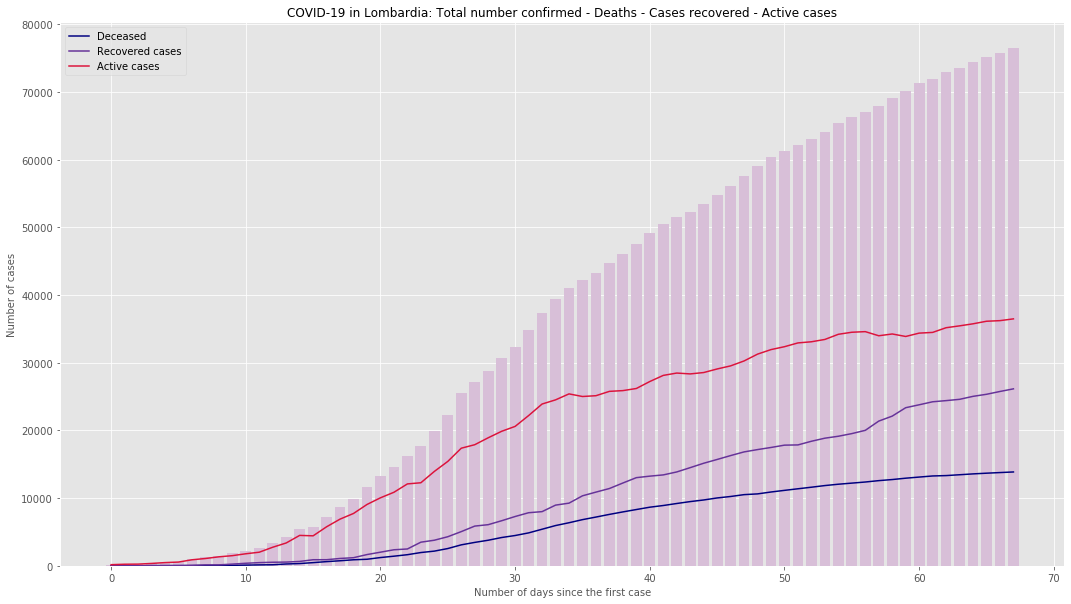

In [30]:
from bokeh.plotting import figure, output_file, show

fig, ax = plt.subplots(figsize=(18,10))


scale = 'linear'
fontsize = 10
y_pos = np.arange(len(datas))

plt.bar(y_pos, total_case, color='thistle')


ax.plot(y_pos,deaths,color='navy')


ax.plot(y_pos,discharged_healed,color='rebeccapurple')


ax.plot(y_pos,total_positive,color='crimson')

      
ax.set_yscale(scale)
plt.legend(fontsize='medium', labels=['Deceased','Recovered cases', 'Active cases'], loc = 'upper left')
plt.savefig('../Imagens/covid_lombardia.png', dpi=300, format='png')
ax.set_title(f'COVID-19 in Lombardia: Total number confirmed - Deaths - Cases recovered - Active cases', fontsize='large')
ax.set_xlabel(f'Number of days since the first case', fontsize='medium')
ax.set_ylabel(f'Number of cases', fontsize='medium')


**Less affected region of italy - Molise**

In [31]:
total_case1 = []
deaths1 = []
datas1 = []
discharged_healed1 = []
total_positive1 = []

for feature in csv_layer.getFeatures():
    if feature['name_region']=="Molise":
        total_case1.append(feature['total_case'])
        deaths1.append(feature['deaths'])
        datas1.append(feature['data'])
        discharged_healed1.append(feature['discharged_healed'])
        total_positive1.append(feature['total_positive'])

Text(131.875, 0.5, 'Number of cases')

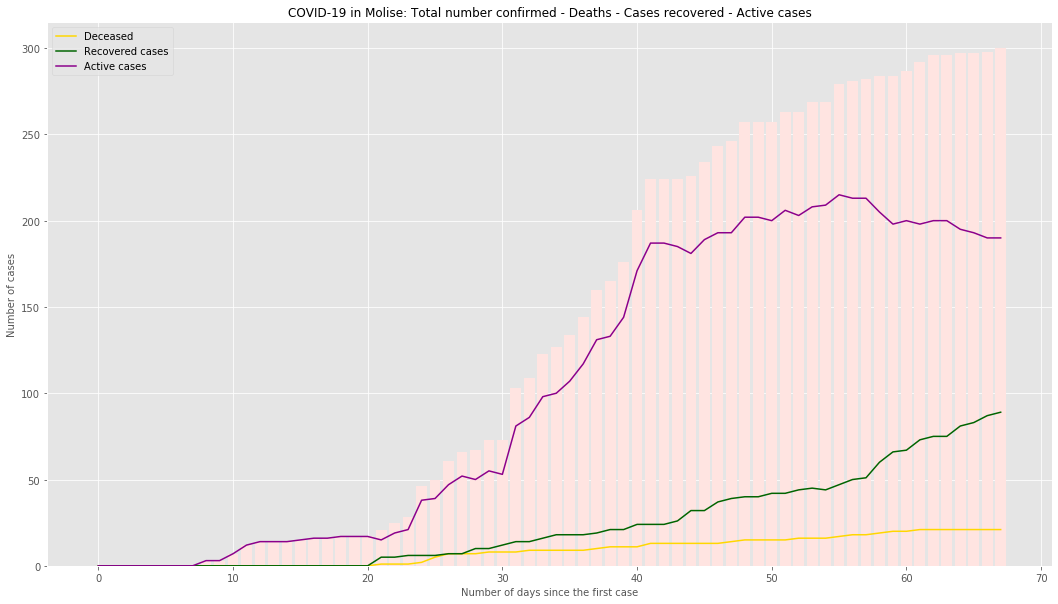

In [32]:
from bokeh.plotting import figure, output_file, show

fig, ax = plt.subplots(figsize=(18,10))


scale = 'linear'
fontsize = 10
y_pos = np.arange(len(datas1))

plt.bar(y_pos, total_case1, color='mistyrose')


ax.plot(y_pos,deaths1,color='gold')


ax.plot(y_pos,discharged_healed1,color='darkgreen')


ax.plot(y_pos,total_positive1,color='darkmagenta')

      
ax.set_yscale(scale)
plt.legend(fontsize='medium', labels=['Deceased','Recovered cases', 'Active cases'], loc = 'upper left')
plt.savefig('../Imagens/covid_molise.png', dpi=300, format='png')
ax.set_title(f'COVID-19 in Molise: Total number confirmed - Deaths - Cases recovered - Active cases', fontsize='large')
ax.set_xlabel(f'Number of days since the first case', fontsize='medium')
ax.set_ylabel(f'Number of cases', fontsize='medium')

 **Growth of COVID-19 in different regions**

In [33]:
transformed = pd.read_csv('../Dataset/covid_italy.csv')
transformed.tail()

,data,stato,code_region,name_region,lat,long,hospitalized_with_sintome,intensive_care,total_hospitalized,home_isolation,total_positive,variation_total_positive,new_positive,discharged_healed,deaths,total_case,material_use,cases_tested,note_it,note_en
1288,2020-05-01,ITA,20,Sardegna,39.215312,9.110616,84,12,96,648,744,0,18,452,117,1313,26242,23442.0,NaN,NaN
1289,2020-05-01,ITA,19,Sicilia,38.115697,13.362357,399,30,429,1742,2171,14,28,786,237,3194,82860,77490.0,NaN,NaN
1290,2020-05-01,ITA,9,Toscana,43.769231,11.255889,520,124,644,4729,5373,-211,93,3218,854,9445,146456,111349.0,NaN,NaN
1291,2020-05-01,ITA,10,Umbria,43.106758,12.388247,60,13,73,131,204,-29,1,1121,68,1393,37762,26285.0,NaN,NaN
1292,2020-05-01,ITA,5,Veneto,45.434905,12.338452,977,110,1087,6692,7779,-368,138,8840,1479,18098,362459,212706.0,NaN,NaN


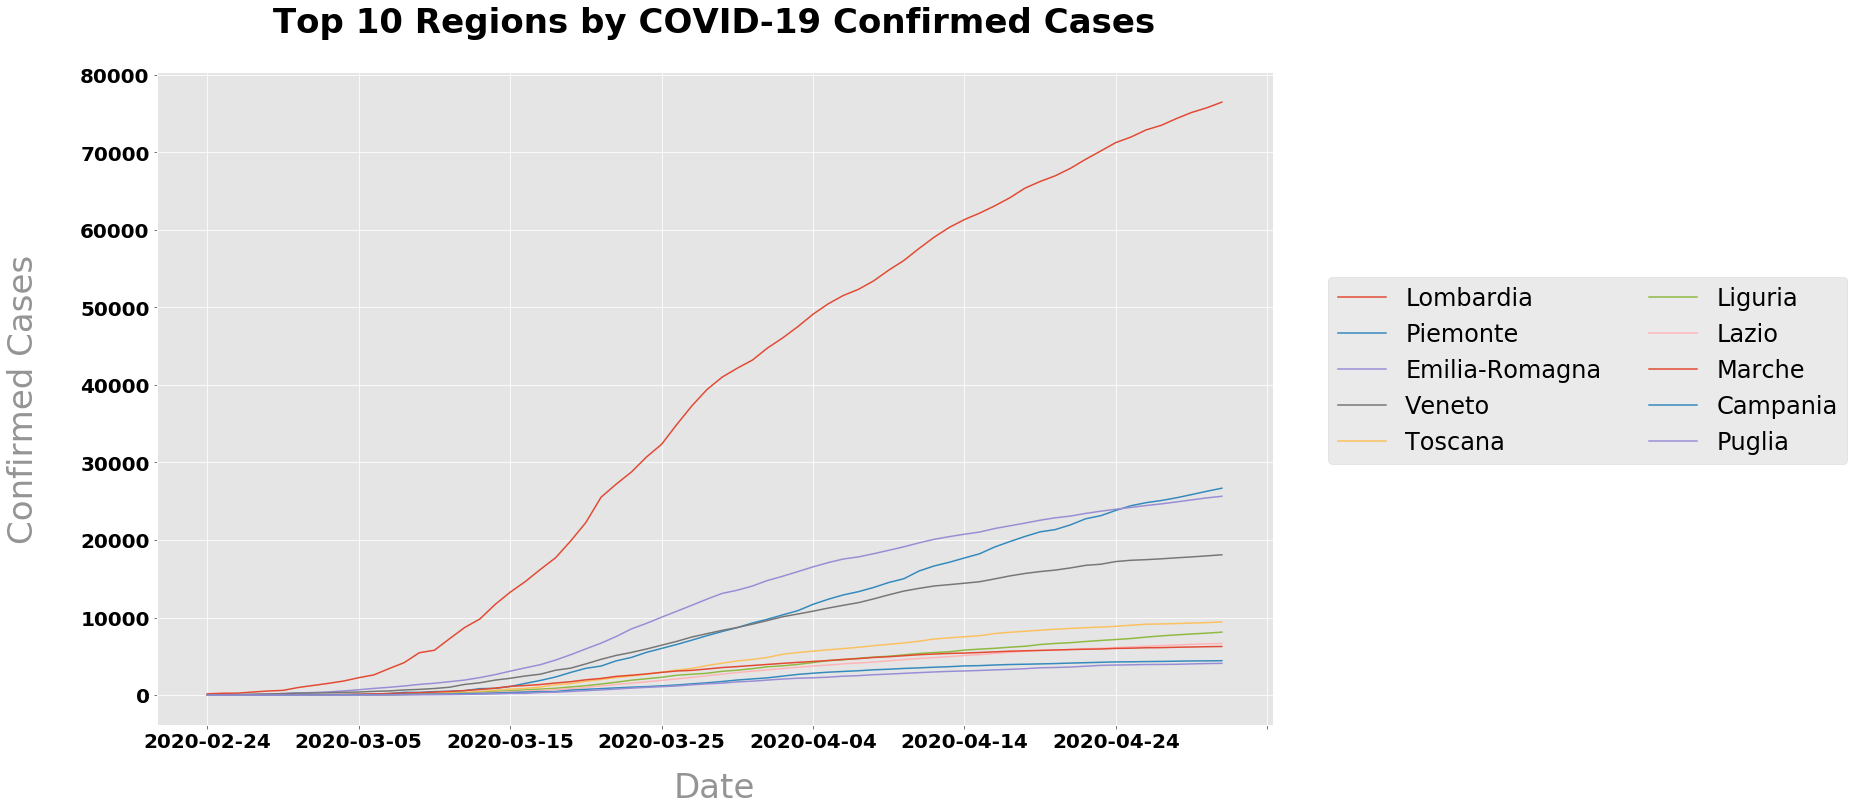

In [37]:
current = transformed[transformed['data']=='2020-05-01']
curCountryTotals = current.groupby(['name_region'])['total_case'].sum()
# top_25=byCountry.max().sort_values(ascending=False)[:20].index
top_10=curCountryTotals.sort_values(ascending=False)[:10].index

#If Country Total Exists, Remove BreakOuts
grouped = transformed.groupby(['name_region', 'data'])['total_case'].sum().reset_index()
byCountry = grouped.pivot(columns='name_region', index='data', values='total_case')
byCountry[top_10].plot(kind='line', figsize=(20,12))
plt.legend(loc=(1.05,.4), fontsize='24', ncol=2)
plt.title("Top 10 Regions by COVID-19 Confirmed Cases", fontsize=34, weight='bold', pad=40)

plt.xticks(fontsize=20, color="black", weight='bold')
plt.yticks(fontsize=20, color="black", weight='bold');
plt.ylabel("Confirmed Cases", fontsize=34, labelpad=40, color='#949494')
plt.xlabel("Date", fontsize=34, labelpad=20, color='#949494')
plt.savefig('../Imagens/Top10_regions_confirmed_cases.png', transparent=True, bbox_inches='tight')